<a href="https://colab.research.google.com/github/Karame12/Projects/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Linear Regression:

In [ ]:
# Importing the Data:
import pandas as pd
Carseats = pd.read_csv('Carseats.csv')
train_Carseats = Carseats.sample(frac = 0.5, random_state = 0)
test_Carseats = Carseats.drop(train_Carseats.index)
Carseats.describe()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,115.614301,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,99.750000,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,199.500000,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,299.250000,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,399.000000,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
# the goal of the statistical analysis is to predict the number of carseats sold by using multiple linear regression model.

Text(0.5, 1.0, 'Age vs. Sales')

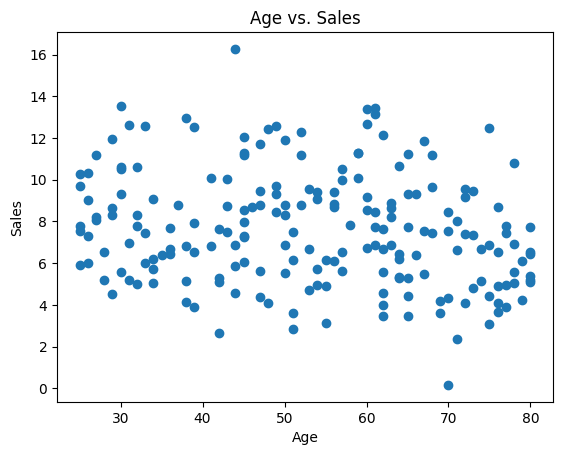

In [ ]:
# Explorting the data:
import matplotlib.pyplot as plt
plt.scatter(train_Carseats['Age'], train_Carseats['Sales'])
plt.xlabel('Age')
plt.ylabel('Sales')
plt.title('Age vs. Sales')

Text(0.5, 1.0, 'Income vs. Sales')

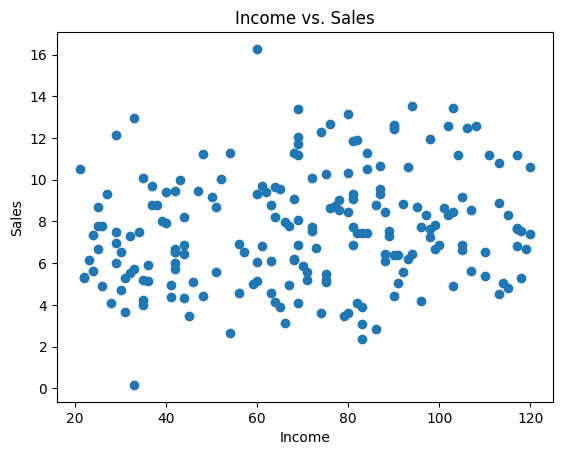

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_Carseats['Income'], train_Carseats['Sales'])
plt.xlabel('Income')
plt.ylabel('Sales')
plt.title('Income vs. Sales')

Text(0.5, 1.0, 'Population vs. Sales')

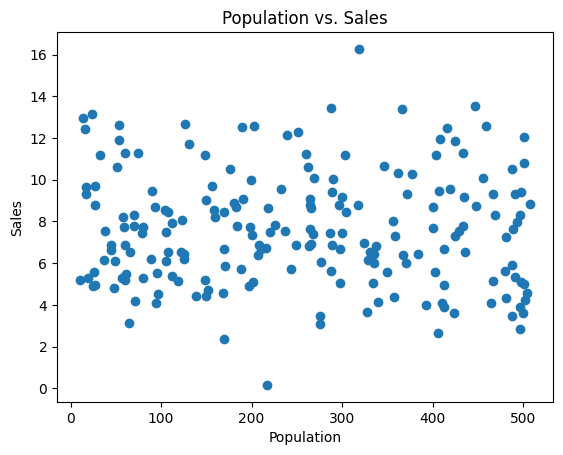

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_Carseats['Population'], train_Carseats['Sales'])
plt.xlabel('Population')
plt.ylabel('Sales')
plt.title('Population vs. Sales')

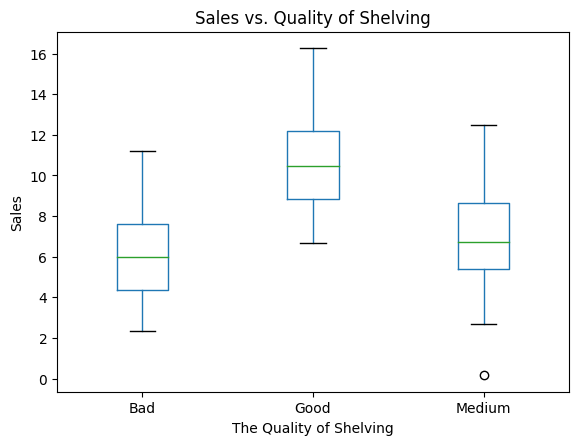

In [ ]:
train_Carseats.boxplot(column=['Sales'], by=['ShelveLoc'])
plt.xlabel('The Quality of Shelving')
plt.ylabel('Sales')
plt.title('Sales vs. Quality of Shelving')
plt.suptitle('')
plt.grid(False)

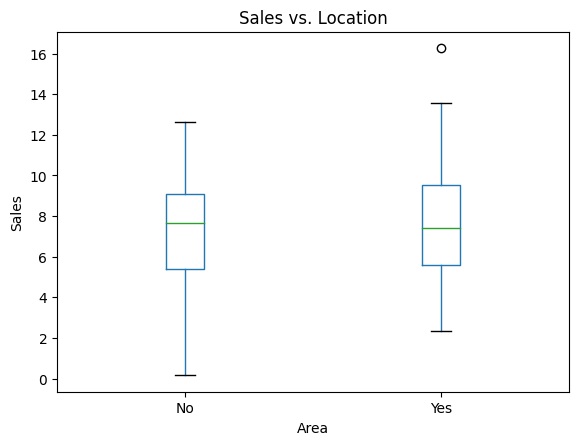

In [ ]:
train_Carseats.boxplot(column=['Sales'], by=['Urban'])
plt.xlabel('Area')
plt.ylabel('Sales')
plt.title('Sales vs. Location')
plt.suptitle('')
plt.grid(False)

In [ ]:
# Model Specification:

# Independent Variable: Sales.
# Dependent Variables: Ag , Income. Population, ShelveLoc, Urban.

import numpy as np

df = pd.get_dummies(Carseats["ShelveLoc"])
df = pd.concat([Carseats, df], axis =1)
print(df)

     Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  \
0             0   9.50        138      73           11         276    120   
1             1  11.22        111      48           16         260     83   
2             2  10.06        113      35           10         269     80   
3             3   7.40        117     100            4         466     97   
4             4   4.15        141      64            3         340    128   
..          ...    ...        ...     ...          ...         ...    ...   
395         395  12.57        138     108           17         203    128   
396         396   6.14        139      23            3          37    120   
397         397   7.41        162      26           12         368    159   
398         398   5.94        100      79            7         284     95   
399         399   9.71        134      37            0          27    120   

    ShelveLoc  Age  Education Urban   US  Bad  Good  Medium  
0         Bad

In [ ]:
# Model Estimations:

import statsmodels.formula.api as smf
est = smf.ols(formula = "Sales ~ Age + Income + Population + Bad + Good + Medium + C(Urban)", data = train_df)
model = est.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     25.17
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           5.64e-22
Time:                        03:04:53   Log-Likelihood:                -425.64
No. Observations:                 200   AIC:                             865.3
Df Residuals:                     193   BIC:                             888.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.3669      0.526     

In [ ]:
# p-value = 5.64e^-22 > 0.05, we reject the Null hypothesis. This means that at least one of the coefficients is nonzero.

In [ ]:
import statsmodels.formula.api as smf
est2 = smf.ols(formula = "Sales ~ Age + Income + Good + Medium", data = train_Carseats)
model2 = est2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     37.97
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           1.77e-23
Time:                        03:14:44   Log-Likelihood:                -425.84
No. Observations:                 200   AIC:                             861.7
Df Residuals:                     195   BIC:                             878.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5286      0.653     10.000      0.0

Text(0.5, 1.0, 'Residuals vs. Fitted Values')

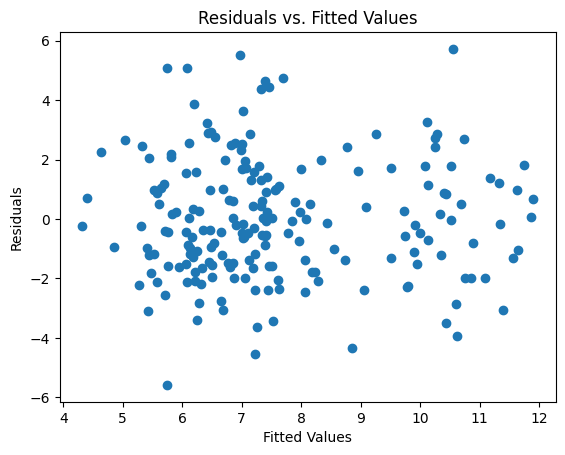

In [ ]:
# Check Residual Graphs: (Diagnostic Checking)
residuals = train_df['Sales'] - model2.fittedvalues
plt.scatter(model2.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

Text(0.5, 1.0, 'Residuals vs. Age')

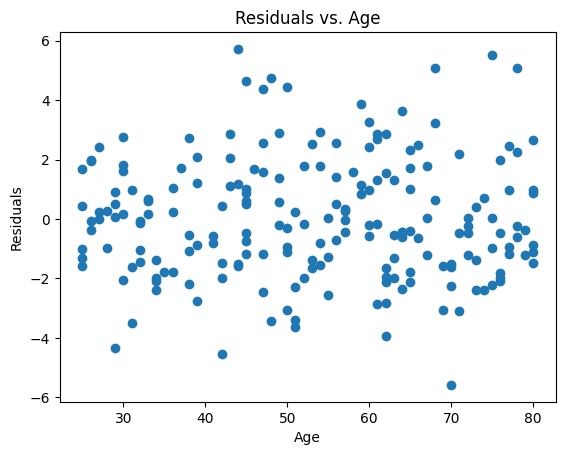

In [ ]:
plt.scatter(train_Carseats['Age'], residuals)
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.title('Residuals vs. Age')

Text(0.5, 1.0, 'Residuals vs. Income')

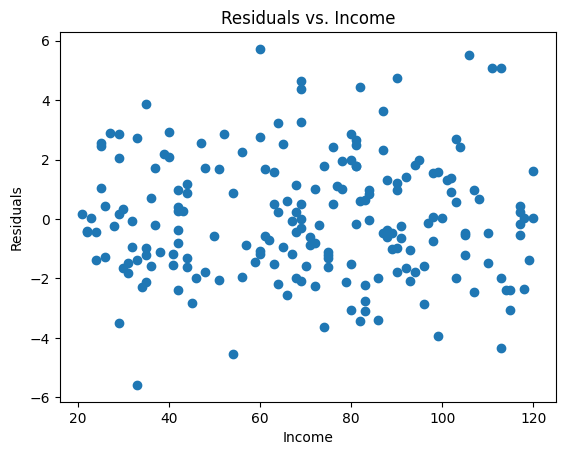

In [ ]:
plt.scatter(train_Carseats['Income'], residuals)
plt.xlabel('Income')
plt.ylabel('Residuals')
plt.title('Residuals vs. Income')

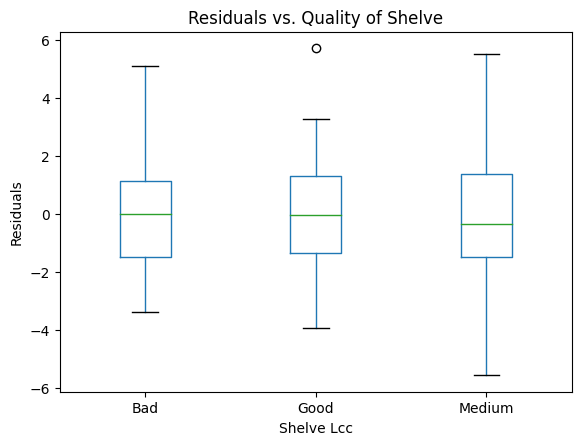

In [ ]:
data_bed = {'residuals': residuals,
        'ShelveLoc': train_df['ShelveLoc']}
data_frame_bed = pd.DataFrame(data_bed)
data_frame_bed.boxplot(column=['residuals'], by=['ShelveLoc'])
plt.xlabel('Shelve Lcc')
plt.ylabel('Residuals')
plt.title('Residuals vs. Quality of Shelve')
plt.suptitle('')
plt.grid(False)

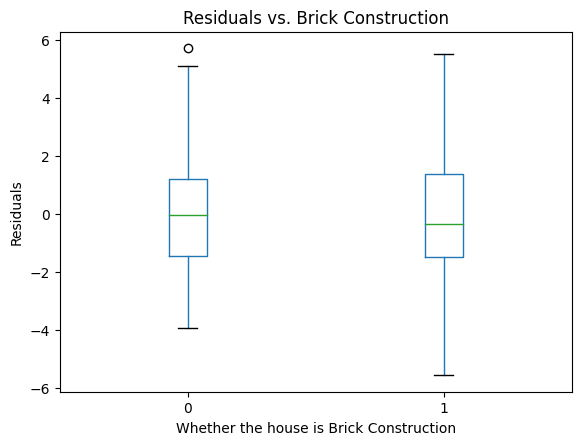

In [ ]:
data = {'residuals': residuals,
        'Medium': train_df['Medium']}
data_frame = pd.DataFrame(data)
data_frame.boxplot(column=['residuals'], by=['Medium'])
plt.xlabel('Whether the house is Brick Construction')
plt.ylabel('Residuals')
plt.title('Residuals vs. Brick Construction')
plt.suptitle('')
plt.grid(False)


Text(0.5, 1.0, 'Histogram of Residuals')

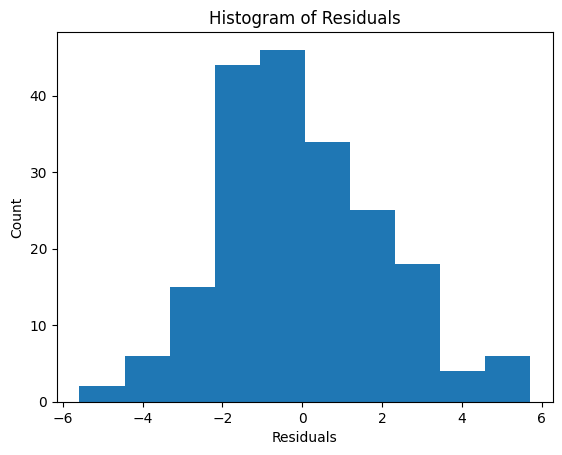

In [ ]:
#Residual Distribution (Diagnostic Checking):
plt.hist(residuals)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals')

((array([-2.70069508, -2.39117927, -2.21476595, -2.08844273, -1.98865134,
         -1.90545091, -1.83366817, -1.77025272, -1.7132485 , -1.66132288,
         -1.61352545, -1.56915347, -1.52767212, -1.48866446, -1.45179889,
         -1.41680716, -1.38346902, -1.35160134, -1.32105008, -1.29168444,
         -1.26339229, -1.23607681, -1.20965371, -1.18404921, -1.1591983 ,
         -1.13504337, -1.11153314, -1.08862177, -1.06626803, -1.04443478,
         -1.02308837, -1.00219826, -0.9817366 , -0.96167793, -0.94199891,
         -0.9226781 , -0.90369573, -0.88503353, -0.86667459, -0.84860322,
         -0.83080482, -0.8132658 , -0.79597346, -0.77891592, -0.76208206,
         -0.74546144, -0.72904425, -0.71282124, -0.69678371, -0.68092342,
         -0.6652326 , -0.64970389, -0.63433029, -0.61910517, -0.60402223,
         -0.58907547, -0.57425918, -0.55956789, -0.5449964 , -0.53053972,
         -0.51619308, -0.50195192, -0.48781183, -0.47376862, -0.45981823,
         -0.44595676, -0.43218046, -0.

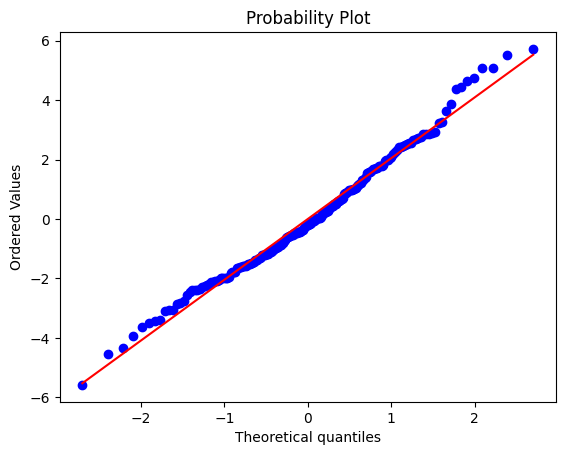

In [ ]:
#Residual Distribution (Diagnostic Checking):

import scipy
scipy.stats.probplot(residuals, plot = plt)

In [ ]:
# Wilk Shapiro Test:
test_statistic, pvalue = scipy.stats.shapiro(residuals)
print(pvalue)

0.09550415724515915


In [ ]:
# Alternative Model:
import statsmodels.formula.api as smf
est4 = smf.ols(formula = "Sales ~ Price + CompPrice", data = train_Carseats)
model4 = est4.fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     45.16
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           7.20e-17
Time:                        03:55:40   Log-Likelihood:                -445.71
No. Observations:                 200   AIC:                             897.4
Df Residuals:                     197   BIC:                             907.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3894      1.376      3.917      0.0

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     37.97
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           1.77e-23
Time:                        03:57:37   Log-Likelihood:                -425.84
No. Observations:                 200   AIC:                             861.7
Df Residuals:                     195   BIC:                             878.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5286      0.653     10.000      0.000       5.241       7.816
Age           -0.0382      0.009     -4.208      0.000      -0.056      -0.020
Income         0.0194      0.005      3.655      0.000       0.009       0.030
Good           4.5377      0.438     10.359      0.000       3.674       5.402
Medium         1.2462      0.376      3.314      0.001       0.505       1.988
==============================================================================
Omnibus:                        4.110   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                3.883
Skew:                           0.340   Prob(JB):                        0.144
Kurtosis:                       3.068   Cond. No.                         443.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     45.16
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           7.20e-17
Time:                        03:57:45   Log-Likelihood:                -445.71
No. Observations:                 200   AIC:                             897.4
Df Residuals:                     197   BIC:                             907.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3894      1.376      3.917      0.000       2.676       8.103
Price         -0.0780      0.009     -9.130      0.000      -0.095      -0.061
CompPrice      0.0898      0.013      7.083      0.000       0.065       0.115
==============================================================================
Omnibus:                        7.558   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.440
Skew:                           0.430   Prob(JB):                       0.0242
Kurtosis:                       2.609   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Mean Squared Error:
from numpy import mean
predictions = model2.predict(test_df)
mean((test_df['Sales'] - predictions)**2)

5.548485089534628

In [ ]:
from numpy import mean
predictions = model4.predict(test_Carseats)
mean((test_Carseats['Sales'] - predictions)**2)

5.276549846149156

In [ ]:
# Model Deployment:
new_data = {'Population': [400000],
            'Age': [41.5],
            'Income': [80000],
            'ShelveLoc': ['Bad'],
            'Urban': ['Yes']}
#Note that we do not need to include the bath information (but we can.)
new_store = pd.DataFrame(new_data)
model2.predict(new_store)

0    1542.904536
dtype: float64

In [ ]:
# Model Deployment:
new_data = {'Population': [50000],
            'Age': [58.2],
            'Income': [75000],
            'ShelveLoc': ['Medium'],
            'Urban': ['No']}
#Note that we do not need to include the bath information (but we can.)
new_store = pd.DataFrame(new_data)
model2.predict(new_store)

0    1447.256131
dtype: float64